# PIZZA SALES REPORT

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('pizzas_sales.csv')
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  01-01-2015   11:38:36   
1         2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2         3         2  five_cheese_l         1  01-01-2015   11:57:40   
3         4         2    ital_supr_l         1  01-01-2015   11:57:40   
4         5         2     mexicana_m         1  01-01-2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   


## PERNYATAAN MASALAH
KEBUTUHAN KPI
Menghitung metrik berikut:
1. Total Pendapatan: Jumlah total harga semua pesanan pizza.
2. Nilai Pesanan Rata-rata: Jumlah rata-rata yang dihabiskan per pesanan, dihitung dengan membagi total pendapatan dengan jumlah total pesanan.
3. Jumlah Pizza yang Terjual: Jumlah total semua pizza yang terjual.
4. Total Pesanan: Jumlah total pesanan yang dilakukan.
5. Rata-rata Pizza Per Pesanan: Jumlah rata-rata pizza yang terjual per pesanan, dihitung dengan membagi jumlah total pizza yang terjual dengan jumlah total pesanan.

### 1. Total Pendapatan: Jumlah total harga semua pesanan pizza.


In [10]:
total_revenue = df['total_price'].sum()
print('Total Revenue:', total_revenue)

Total Revenue: 817860.05


### 2. Nilai Pesanan Rata-rata: Jumlah rata-rata yang dihabiskan per pesanan, dihitung dengan membagi total pendapatan dengan jumlah total pesanan.

In [11]:
average_order_value = total_revenue / df['order_id'].nunique()
print('Average Order Value:', average_order_value)

Average Order Value: 38.30726229508197


### 3. Jumlah Pizza yang Terjual: Jumlah total semua pizza yang terjual.

In [12]:
total_pizzas_sold = df['quantity'].sum()
print('Total Pizzas Sold:', total_pizzas_sold)

Total Pizzas Sold: 49574


### 4. Total Pesanan: Jumlah total pesanan yang dilakukan.


In [14]:
total_orders = df['order_id'].nunique()
print('Total Orders:', total_orders)

Total Orders: 21350


### 5. Rata-rata Pizza Per Pesanan: Jumlah rata-rata pizza yang terjual per pesanan, dihitung dengan membagi jumlah total pizza yang terjual dengan jumlah total pesanan.


In [15]:
average_pizza_per_order = total_pizzas_sold / total_orders
print('Average Pizza Per Order:', average_pizza_per_order)

Average Pizza Per Order: 2.321967213114754


# KEBUTUHAN GRAFIK
Mengidentifikasi persyaratan berikut untuk membuat grafik:


### 1. Tren Harian untuk Total Pesanan:
Buat diagram batang yang menampilkan tren harian total pesanan selama periode waktu tertentu. Grafik ini akan
membantu kami mengidentifikasi pola atau fluktuasi volume pesanan setiap hari.


In [17]:
import matplotlib.pyplot as plt

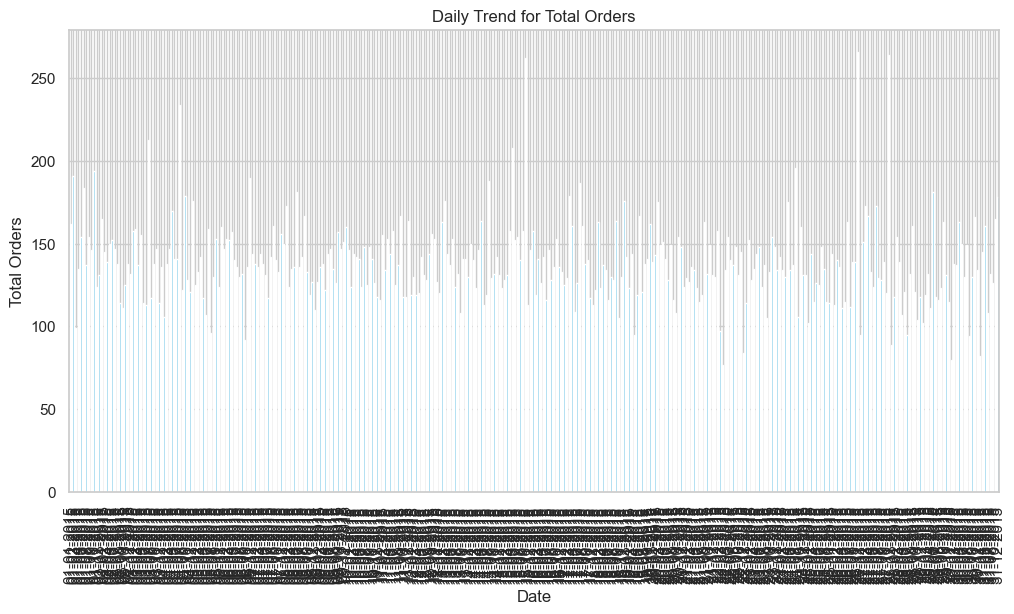

In [18]:
daily_orders = df.groupby('order_date')['quantity'].sum()
daily_orders.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Daily Trend for Total Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.show()

### 2. Tren Bulanan / Per Jam / Mingguan untuk Total Pesanan:
Buatlah grafik garis yang menggambarkan tren per jam dari total pesanan sepanjang hari. Bagan ini akan memungkinkan kami untuk mengidentifikasi jam sibuk atau periode aktivitas pesanan yang tinggi.


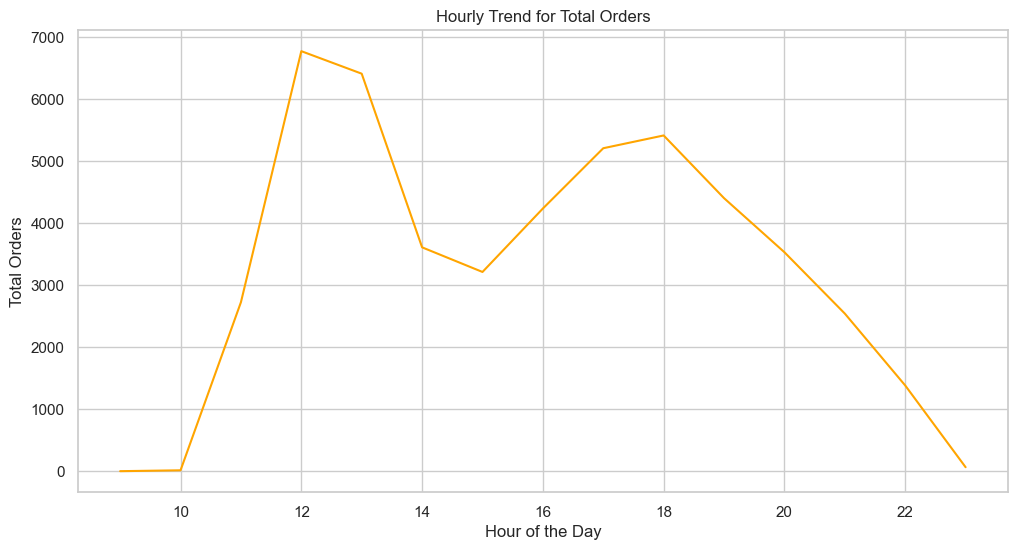

In [19]:
df['order_time'] = pd.to_datetime(df['order_time'])
hourly_orders = df.groupby(df['order_time'].dt.hour)['quantity'].sum()
hourly_orders.plot(kind='line', figsize=(12, 6), color='orange')
plt.title('Hourly Trend for Total Orders')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

### 3. Persentase Penjualan berdasarkan Kategori Pizza:
Buat diagram lingkaran yang menunjukkan distribusi penjualan di berbagai kategori pizza. Bagan ini akan memberikan wawasan tentang popularitas berbagai kategori pizza dan kontribusinya terhadap penjualan secara keseluruhan.


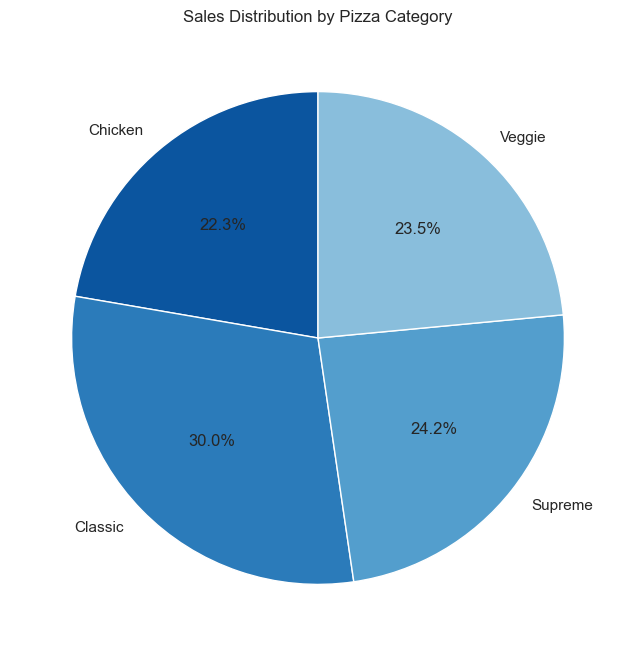

In [20]:
category_sales = df.groupby('pizza_category')['quantity'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 8))
plt.title('Sales Distribution by Pizza Category')
plt.ylabel('')
plt.show()

### 4. Persentase Penjualan berdasarkan Ukuran Pizza:
Buatlah diagram lingkaran yang merepresentasikan persentase penjualan yang dikaitkan dengan ukuran pizza yang berbeda. Ini
ini akan membantu kami memahami preferensi pelanggan untuk ukuran pizza dan dampaknya terhadap penjualan.


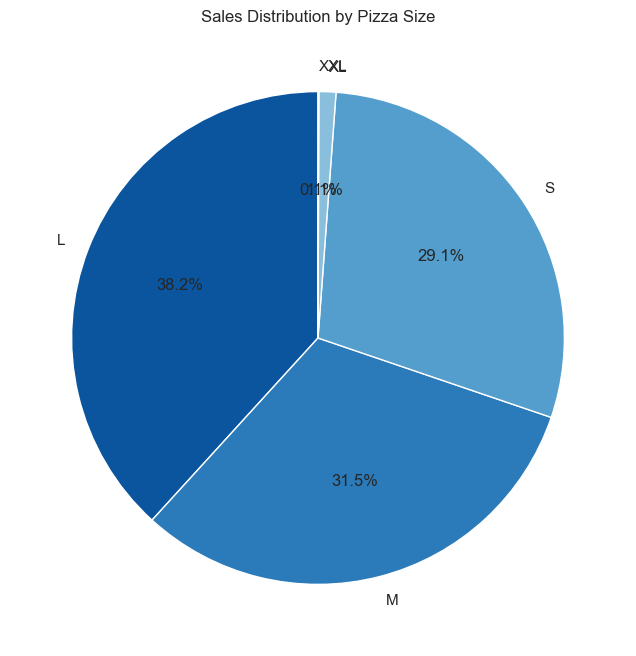

In [21]:
category_sales = df.groupby('pizza_size')['quantity'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 8))
plt.title('Sales Distribution by Pizza Size')
plt.ylabel('')
plt.show()

### 5. Total Pizza yang Terjual berdasarkan Kategori Pizza:
Buat bagan corong yang menyajikan jumlah total pizza yang terjual untuk setiap kategori pizza. Bagan ini akan memungkinkan kita untuk membandingkan kinerja penjualan dari berbagai kategori pizza.


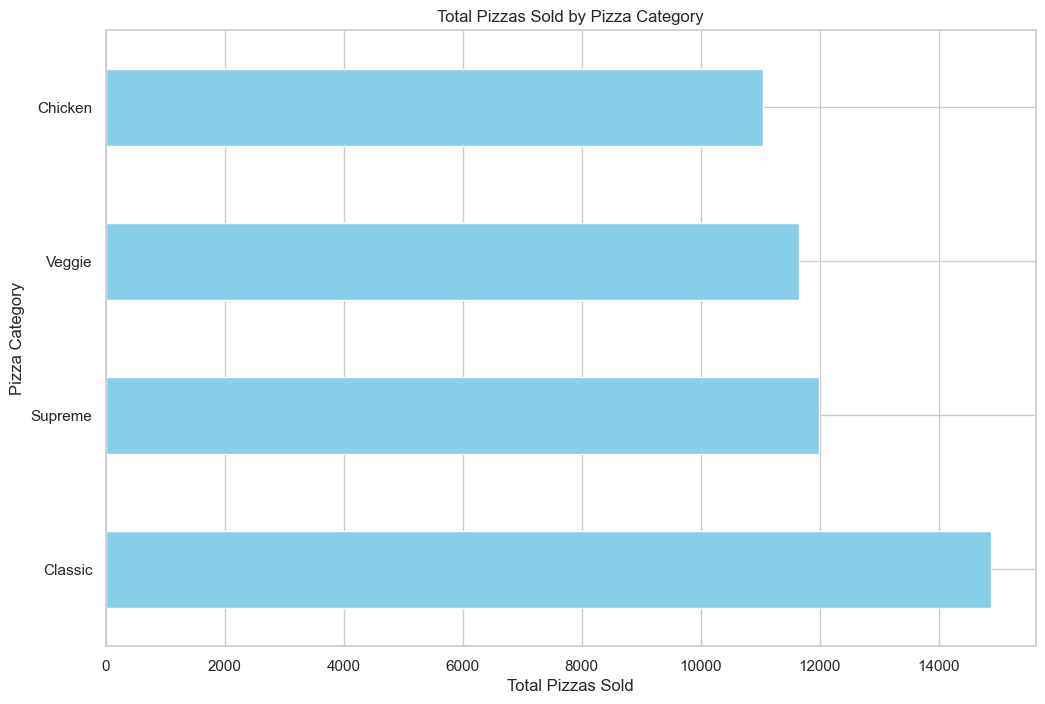

In [22]:
category_sales = df.groupby('pizza_category')['quantity'].sum()
category_sales.sort_values(ascending=False).plot(kind='barh', color='skyblue', figsize=(12, 8))
plt.title('Total Pizzas Sold by Pizza Category')
plt.xlabel('Total Pizzas Sold')
plt.ylabel('Pizza Category')
plt.show()

### 6. 5 Penjual Terbaik Berdasarkan Pendapatan, Jumlah Total, dan Total Pesanan
Buat diagram batang yang menyoroti 5 pizza terlaris berdasarkan Pendapatan, Jumlah Total, Total Pesanan. Bagan ini akan membantu kita mengidentifikasi pilihan pizza yang paling populer.


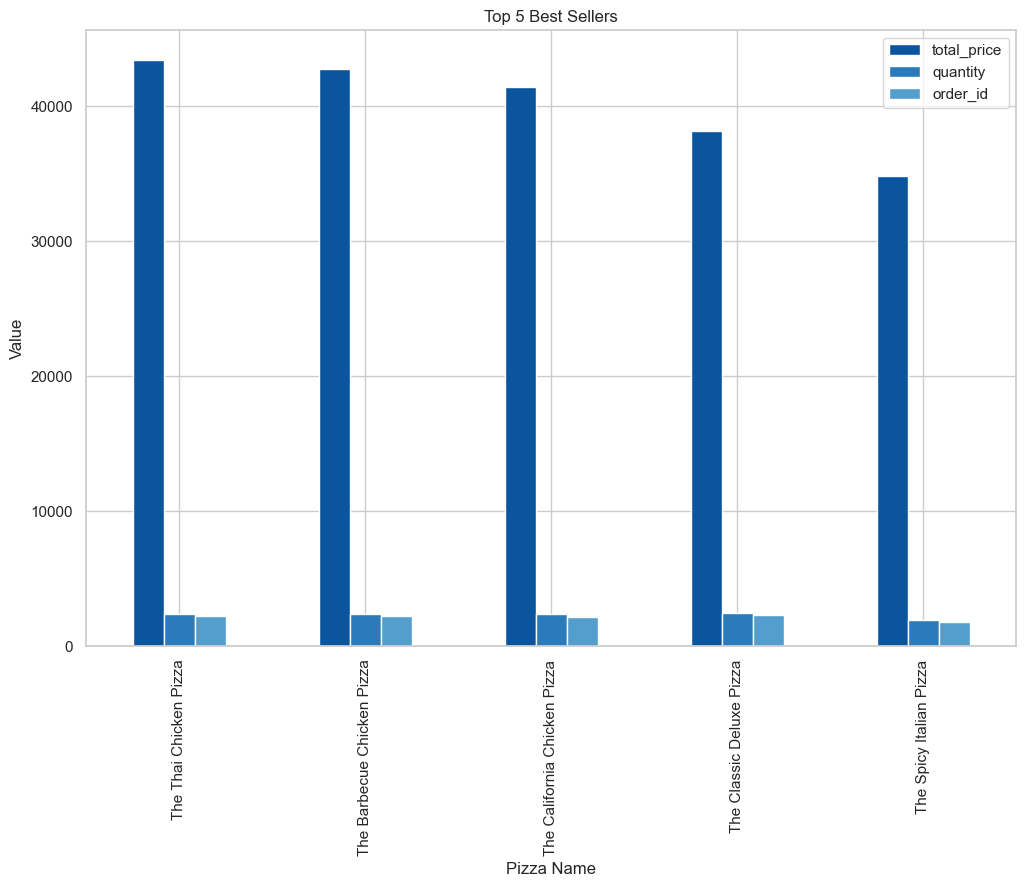

In [23]:
top_sellers = df.groupby('pizza_name').agg({'total_price': 'sum', 'quantity': 'sum', 'order_id': 'nunique'}).nlargest(5, 'total_price')
top_sellers.plot(kind='bar', y=['total_price', 'quantity', 'order_id'], figsize=(12, 8))
plt.title('Top 5 Best Sellers')
plt.xlabel('Pizza Name')
plt.ylabel('Value')
plt.show()

### 7. 5 Teratas Penjual Terbaik berdasarkan Pendapatan, Jumlah Total, dan Total Pesanan
Buat diagram batang yang menampilkan 5 pizza terlaris berdasarkan Pendapatan, Jumlah Total, Total Pesanan. Bagan ini akan memungkinkan kita untuk mengidentifikasi pilihan pizza yang berkinerja buruk atau kurang populer.


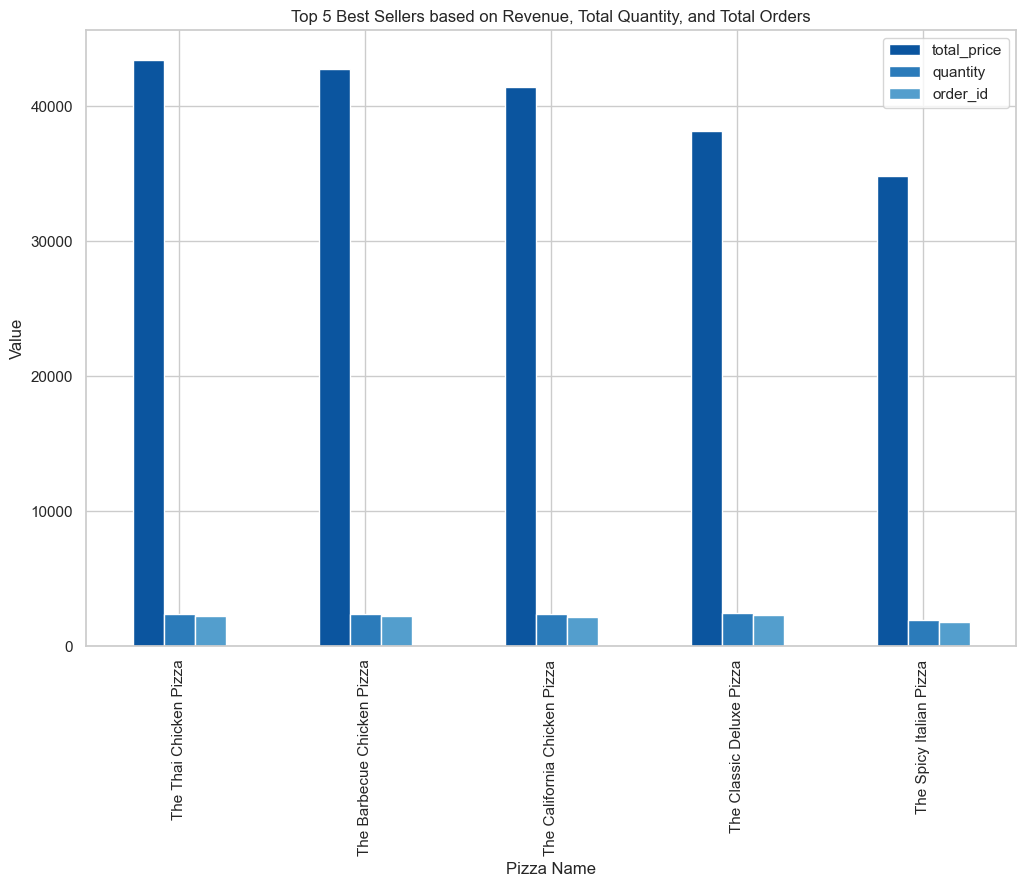

In [24]:
top_sellers = df.groupby('pizza_name').agg({'total_price': 'sum', 'quantity': 'sum', 'order_id': 'nunique'}).nlargest(5, 'total_price')
top_sellers.plot(kind='bar', y=['total_price', 'quantity', 'order_id'], figsize=(12, 8))
plt.title('Top 5 Best Sellers based on Revenue, Total Quantity, and Total Orders')
plt.xlabel('Pizza Name')
plt.ylabel('Value')
plt.show()